In [275]:
import pandas as pd
import numpy as np
import datetime
import matplotlib.pyplot as plt

filepath = './sunspot.txt'

data = pd.read_csv(filepath, sep=' ', skipinitialspace=True, index_col = 0, header=None) #parse_dates=[0]

stack = data.stack()

new_index=stack.index.map(lambda x: datetime.datetime(x[0],x[1],1,0,0))
data = pd.Series(stack.values, index=new_index.values)

data.index.name = 'date'

test = data['2010':]
train = data[:'2009']

<IPython.core.display.Javascript object>


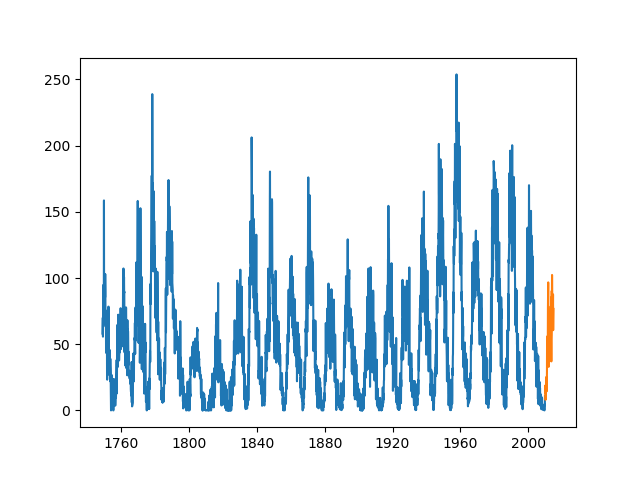

In [279]:
%matplotlib notebook
plt.plot(train)
plt.plot(test)
plt.show()

In [346]:
data_array = train.values
# https://machinelearningmastery.com/convert-time-series-supervised-learning-problem-python/
def series_to_supervised(data_array, K=1):
    X = np.array([])
    Y = np.array([])

    for i in range(len(data_array)-K):
        X = np.append(X, data_array[i:K+i])
        Y = np.append(Y, data_array[K+i])
    X = X.reshape((-1,K))
    return (X, Y)

X_train, Y_train = series_to_supervised(train.values, 20)
X_test, Y_test = series_to_supervised(train.values, 20)

<IPython.core.display.Javascript object>


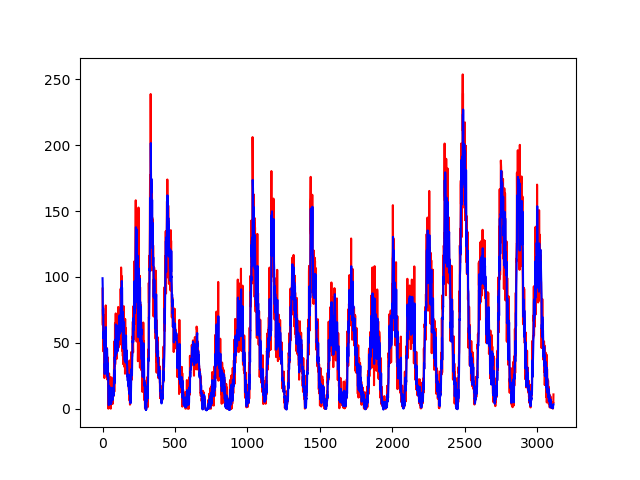

In [350]:
from sklearn.linear_model import LinearRegression

lr = LinearRegression(fit_intercept=False)
lr = lr.fit(X_train, Y_train)

y_pred = lr.predict(X_test)

%matplotlib notebook
plt.figure(1)
plt.plot(Y_test, color='red')
plt.plot(y_pred, color='blue')
plt.show()
